In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv("drawndata1.csv")

In [6]:
X = df[['x','y']].values
y = df['z'] == 'a'
colors = y.map({True: 'blue', False: 'red'})

In [1]:
plt.scatter(X[:,0],X[:,1],c=y)

NameError: name 'plt' is not defined

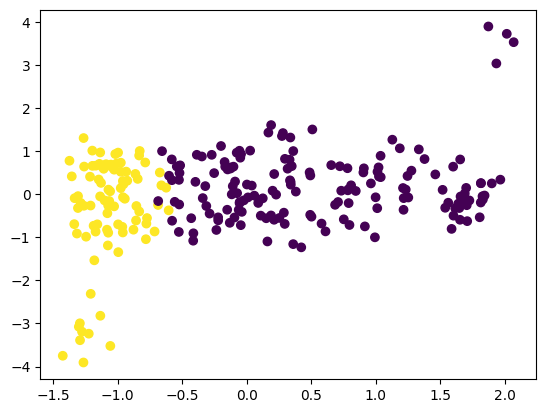

In [8]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X) #X= X-mean(X)/sqrt(var x)
plt.scatter(X_new[:,0],X_new[:,1],c=y)

(array([ 13., 125., 153., 138.,  87.,  88.,  72.,  44.,  45.,  42.,  40.,
         30.,  15.,  16.,  22.,  23.,   9.,   7.,   8.,   5.,   4.,   2.,
          4.,   2.,   1.,   2.,   1.,   0.,   1.,   1.]),
 array([-1.3009061 , -1.09436619, -0.88782628, -0.68128638, -0.47474647,
        -0.26820656, -0.06166665,  0.14487326,  0.35141317,  0.55795308,
         0.76449298,  0.97103289,  1.1775728 ,  1.38411271,  1.59065262,
         1.79719253,  2.00373243,  2.21027234,  2.41681225,  2.62335216,
         2.82989207,  3.03643198,  3.24297189,  3.44951179,  3.6560517 ,
         3.86259161,  4.06913152,  4.27567143,  4.48221134,  4.68875124,
         4.89529115]),
 <BarContainer object of 30 artists>)

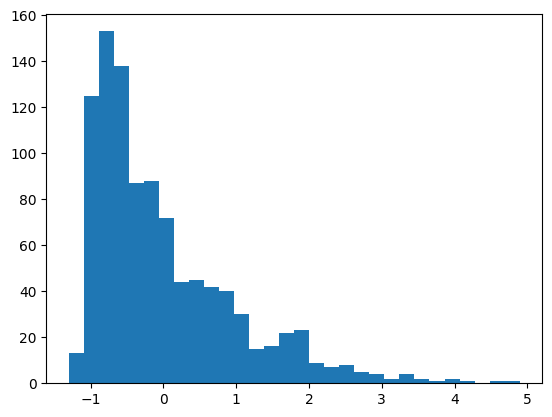

In [18]:
x=np.random.normal(0, 1, (1000))+np.random.exponential(10, (1000))
plt.hist((x-np.mean(x))/np.std(x),30)

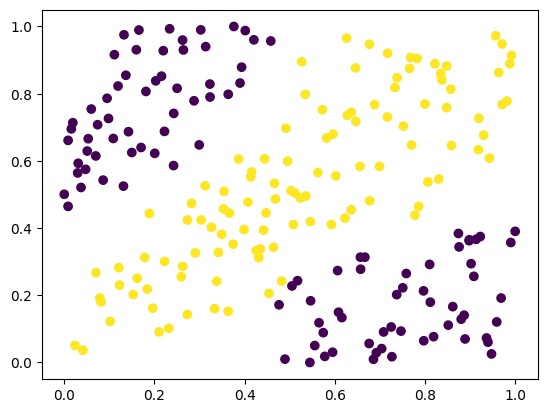

In [24]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X) #X= X-mean(X)/sqrt(var x)
plt.scatter(X_new[:,0],X_new[:,1],c=y)

In [56]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

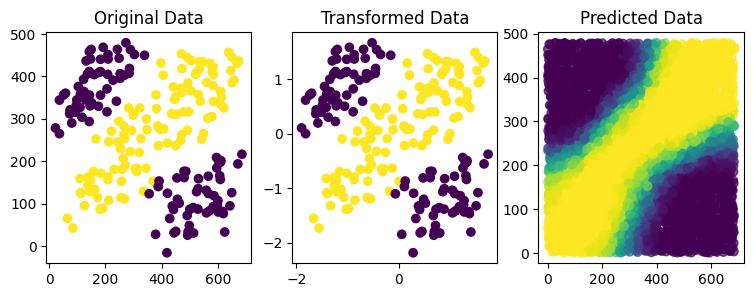

In [58]:
plot_output(scaler=StandardScaler())

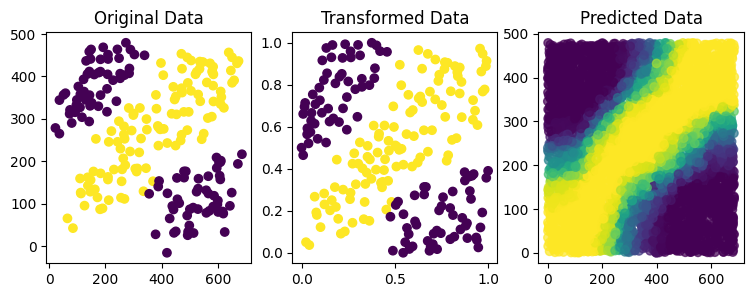

In [60]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

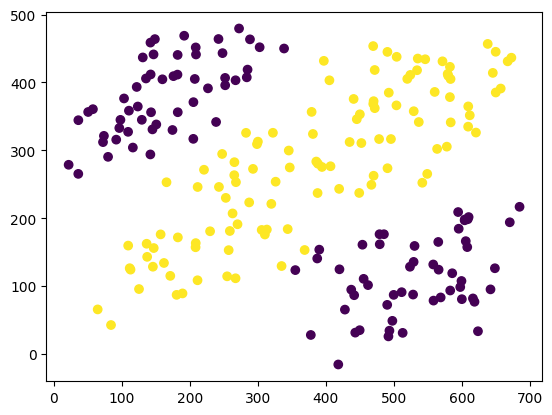

In [22]:
df = pd.read_csv("drawndata2.csv")
X=df[['x','y']].values
y = df['z'] == 'a'
colors = y.map({True: 'blue', False: 'red'})
plt.scatter(X[:,0],X[:,1],c=y)

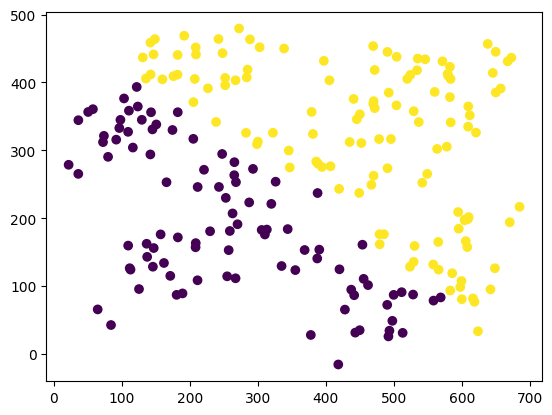

In [30]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("scale",QuantileTransformer(n_quantiles=100)),
    ("model",LogisticRegression())
])
pred = pipe.fit(X,y).predict(X)

plt.scatter(X[:,0],X[:,1],c=pred)

In [66]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)
enc.transform([["zero"]])

array([[0., 0., 0.]])